In [20]:
import cv2 as cv
import numpy as np
x = np.fromfile(r"/home/sms/vws/frappe/x.bin", dtype=np.float32)
X = np.reshape(x, (64, 1, 110, 256, 256))
video = X[0, :, :, :]
# The video feed is read in as a VideoCapture object
#cap = cv.VideoCapture("/home/sms/Videos/sample.mp4")
# ret = a boolean return value from getting the frame, first_frame = the first frame in the entire video sequence
#ret, first_frame = cap.read()
# Converts frame to grayscale because we only need the luminance channel for detecting edges - less computationally expensive
frame = video[:,0,:, :].squeeze()
frame = cv.merge((frame, frame, frame))
prev_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

# First frame

# Creates an image filled with zero intensities with the same dimensions as the frame
mask = np.zeros_like(frame)
# Sets image saturation to maximum
mask[..., 1] = 255

In [52]:
for idx in range(video.shape[1]):
    # ret = a boolean return value from getting the frame, frame = the current frame being projected in the video
    frame = video[:,idx,:, :].squeeze()
    frame = cv.merge((frame, frame, frame))
    # Opens a new window and displays the input frame
    cv.imshow("input", frame)
    # Converts each frame to grayscale - we previously only converted the first frame to grayscale
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # Calculates dense optical flow by Farneback method
    # https://docs.opencv.org/3.0-beta/modules/video/doc/motion_analysis_and_object_tracking.html#calcopticalflowfarneback
    flow = cv.calcOpticalFlowFarneback(prev_gray, gray, flow=None,
                                        pyr_scale=0.9, levels=1, winsize=20,
                                        iterations=5,
                                        poly_n=100, poly_sigma=1.1, flags=0)
    # Computes the magnitude and angle of the 2D vectors
    magnitude, angle = cv.cartToPolar(flow[..., 0], flow[..., 1])
    # Sets image hue according to the optical flow direction
    mask[..., 0] = angle * 180 / np.pi / 2
    # Sets image value according to the optical flow magnitude (normalized)
    mask[..., 2] = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)
    # Converts HSV to RGB (BGR) color representation
    rgb = cv.cvtColor(mask, cv.COLOR_HSV2BGR)
    # Opens a new window and displays the output frame
    cv.imshow("dense optical flow", rgb)
    # Updates previous frame
    prev_gray = gray
    # Frames are read by intervals of 1 millisecond. The programs breaks out of the while loop when the user presses the 'q' key
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
# The following frees up resources and closes all windows
cv.destroyAllWindows()

In [4]:
cv.imshow("image", video[:,20,:, :].squeeze())

In [49]:
cv.destroyAllWindows()

In [2]:
import matplotlib.pyplot as plt

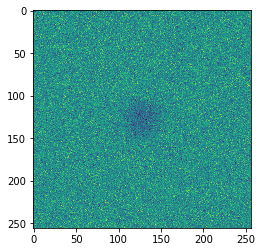

In [16]:
plt.imshow(video[:,20,:, :].squeeze())

In [9]:
img = cv.merge((video[:,20,:, :].squeeze(),video[:,20,:, :].squeeze(),video[:,20,:, :].squeeze()))

In [13]:
cv.imshow("image", gray)

In [12]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

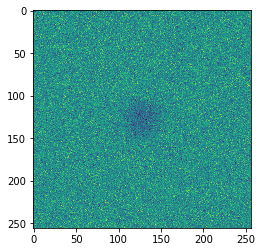

In [15]:
plt.imshow(gray)